# Homework 2 Part 2

**Due: Tuesday, February 15 @ 11:59 pm**

This is an individual assignment.

In [10]:
# Import libraries and magics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import scipy.stats as stats

## Crab Dataset Description

The Crab Data Set has 200 samples and 7 features (Frontal Lip, Rear Width, Length, Width, Depth, Male and Female), describing 5 morphological measurements on 50 crabs each of two color forms and both sexes, of the species *Leptograpsus* variegatus collected at Fremantle, W. Australia.

* Dataset Source: Campbell, N.A. and Mahon, R.J. (1974) A multivariate study of variation in two species of rock crab of genus *Leptograpsus*. *Australian Journal of Zoology* 22, 417–425.

The data set is saved in the file "crab.txt": the firt column corresponds to the class label (crab species) and the other 7 columns correspond to the features.

**Use the first 140 samples as your training set and the last 60 samples as your test set.**

## Problem Set

Answer the following questions:

1. Implement the Naive Bayes classifier, under the assumption that your data likelihood model $p(x|C_j)$ is a multivariate Gaussian and the prior probabilities $p(C_j)$ are dictated by the number of samples $n_j\in\mathbb{R}$ that you have for each class. Build your own code to implement the classifier.

2. Did you encounter any problems when implementing the probabilistic generative model? What is your solution for the problem? Explain why your solution works. (Note: There is more than one solution.)

3. Report your classification results in terms of a confusion matrix in both training and test set. (You can use the function ```confusion_matrix``` from the module ```sklearn.metrics```.)

In [11]:
import pandas as pd
df = pd.read_csv("crab.txt", delimiter="\t")

df.head()

,Species,FrontalLip,RearWidth,Length,Width,Depth,Male,Female
0,0,20.6,14.4,42.8,46.5,19.6,1,0
1,1,13.3,11.1,27.8,32.3,11.3,1,0
2,0,16.7,14.3,32.3,37.0,14.7,0,1
3,1,9.8,8.9,20.4,23.9,8.8,0,1
4,0,15.6,14.1,31.0,34.5,13.8,0,1


In [12]:
data = df.to_numpy()
target = data[:,0]
features = data[:, 1:7]

#Regularization
f_min = features.min(axis=0, keepdims=True)
f_max = features.max(axis=0, keepdims=True)
features = (features - f_min)/(f_max - f_min)

x_train, x_test, label_train, label_test = features[:140], features[140:], target[:140], target[140:]
X_zero = x_train[label_train==0]
X_one = x_train[label_train==1]

In [13]:
#Training
mu_zero = np.mean(X_zero, axis=0)
mu_one = np.mean(X_one, axis=0)

cov_zero = np.cov(X_zero.T)
cov_one = np.cov(X_one.T)

N = X_zero.shape[0] + X_one.shape[0]

p_zero = X_zero.shape[0]/N
p_one = X_one.shape[0]/N

In [14]:
#Classifying training set
i = 0
y_pred_train = []
for x in x_train:
    G_zero = stats.multivariate_normal.pdf(x, mean=mu_zero, cov=cov_zero)
    G_one = stats.multivariate_normal.pdf(x, mean=mu_one, cov=cov_one)
    pos_zero = G_zero*p_zero / (G_one*p_one + G_zero*p_zero)
    pos_one = G_one*p_one / (G_one*p_one + G_zero*p_zero)
    
    if pos_zero > pos_one: l = 0
    else: l = 1

    y_pred_train.append(l)
    
    i += 1

In [15]:
#Classifying test set
i = 0
y_pred_test = []
for x in x_test:
    G_zero = stats.multivariate_normal.pdf(x, mean=mu_zero, cov=cov_zero)
    G_one = stats.multivariate_normal.pdf(x, mean=mu_one, cov=cov_one)
    pos_zero = G_zero*p_zero / (G_one*p_one + G_zero*p_zero)
    pos_one = G_one*p_one / (G_one*p_one + G_zero*p_zero)
    
    if pos_zero > pos_one: l = 0
    else: l = 1
    
    y_pred_test.append(l)
    
    i += 1

Confusion Matrix for training set:


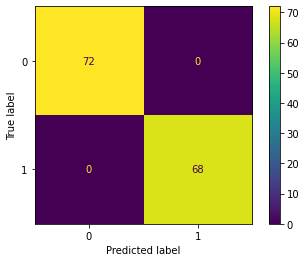

In [20]:
cm_train = confusion_matrix(label_train, y_pred_train)
print('Confusion Matrix for training set:')
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot();

Confusion Matrix for test set:


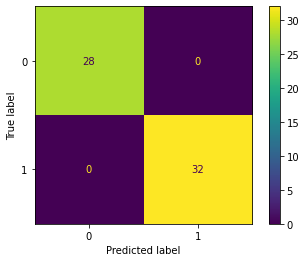

In [22]:
cm_test = confusion_matrix(label_test, y_pred_test)
print('Confusion Matrix for test set:')
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot();

PROBLEMS:
- Singular matrix when running multivariate normal
- Unable to broadcast input array multivariate normal
- Unable to broadcast during posterior calculation (uneven number of samples)

I ran into a couple problems when trying to complete this assignment. The first one was when calling multivariate normal, I was getting an error that my covariance matrix was singular. This was caused by columns in the data being collinear, specifically the male and female category. To alleviate this issue, I disreguarded the female category as 0 in the male category was enough to specify the gender of the crab. Another issue that I ran into was just a misunderstanding of how to use multivariate normal. Originally, I was passing all data labelled as species 0 then all data labelled as species 1 into multivariate normal and wasn't able to compute the posterior as there are different number of samples. That was just a misunderstanding of the process of developing the model. When I realized the training of the model is simply finding the mean, covariance matrix and the prior probabilities, I was able to properly categorize the data. Each data point is passed into the multivariate normal function, the posterior is computed, compared then compared to the expected label.

The results are reported using a confusion matrix. Since there are 2 classes, the confusion matrix is 2x2. It is interpreted as each column and row represents a class. The columns represent the predictions and the rows represent the actual values. Since the matrices only contain non-zero values on the main diagonals, the model accurately predicted the species of crab for each of the samples given. 

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.